
<br>
<font>
<!-- <img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" alt="SUT logo" width=300 height=300 align=left class="saturate"> -->
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=200 height=200>
<br>
<font color=0F5298 size=7>
Machine Learning <br>
<font color=2565AE size=5>
Electrical Engineering Department <br>
Spring 2024<br>
<font color=3C99D size=5>
Practical Assignment 4 <br>
<font color=696880 size=4>
<!-- <br> -->


____

# Personal Data

In [1]:
student_number = '400101861'
first_name = 'ahmadreza'
last_name = 'majlesara'

# Introduction

In this assignment, we will be performing clustering on Spotify songs.

# Data Preprocessing

In the next cell, import the libraries you'll need.

In [47]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.manifold import TSNE
from IPython.display import display
from matplotlib import pyplot as plt
from scipy.spatial.distance import euclidean
from sklearn.decomposition import PCA
import random
from sklearn.metrics import silhouette_score
import seaborn as sns

In the `spotify.csv` file, load the data. Exclude unrelated features and retain only the track name and the features you believe are relevant.

In [3]:
spotify_data = pd.read_csv('spotify.csv')
desired_columns = ['track_name', 'danceability', 'energy', 'playlist_subgenre',
                    'key', 'loudness', 'speechiness', 'acousticness', 
                    'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

spotify_data = spotify_data[desired_columns]
spotify_data = spotify_data.dropna()

display(spotify_data.head(10))

track_name  danceability  energy  \
0  I Don't Care (with Justin Bieber) - Loud Luxur...         0.748   0.916   
1                    Memories - Dillon Francis Remix         0.726   0.815   
2                    All the Time - Don Diablo Remix         0.675   0.931   
3                  Call You Mine - Keanu Silva Remix         0.718   0.930   
4            Someone You Loved - Future Humans Remix         0.650   0.833   
5  Beautiful People (feat. Khalid) - Jack Wins Remix         0.675   0.919   
6                    Never Really Over - R3HAB Remix         0.449   0.856   
7           Post Malone (feat. RANI) - GATTÜSO Remix         0.542   0.903   
8             Tough Love - Tiësto Remix / Radio Edit         0.594   0.935   
9                If I Can't Have You - Gryffin Remix         0.642   0.818   

  playlist_subgenre  key  loudness  speechiness  acousticness  \
0         dance pop    6    -2.634       0.0583        0.1020   
1         dance pop   11    -4.969       0.0373        0.0724   
2         dance pop    1    -3.432       0.0742        0.0794   
3         dance pop    7    -3.778       0.1020        0.0287   
4         dance pop    1    -4.672       0.0359        0.0803   
5         dance pop    8    -5.385       0.1270        0.0799   
6         dance pop    5    -4.788       0.0623        0.1870   
7         dance pop    4    -2.419       0.0434        0.0335   
8         dance pop    8    -3.562       0.0565        0.0249   
9         dance pop    2    -4.552       0.0320        0.0567   

   instrumentalness  liveness  valence    tempo  duration_ms  
0          0.000000    0.0653    0.518  122.036       194754  
1          0.004210    0.3570    0.693   99.972       162600  
2          0.000023    0.1100    0.613  124.008       176616  
3          0.000009    0.2040    0.277  121.956       169093  
4          0.000000    0.0833    0.725  123.976       189052  
5          0.000000    0.1430    0.585  124.982       163049  
6          0.000000    0.1760    0.152  112.648       187675  
7          0.000005    0.1110    0.367  127.936       207619  
8          0.000004    0.6370    0.366  127.015       193187  
9          0.000000    0.0919    0.590  124.957       253040

In this cell, you should implement a standard scalar function from scratch and applying it to your data. Explian importance behind using a standard scalar and the potential complications that could arise in clustering if it's not employed. (you can't use `sklearn.preprocessing.StandardScaler` but you are free to use `sklearn.preprocessing.LabelEncoder`)

`Answer:`

### Importance of Using a Standard Scaler

1. **Equal Weight**: Prevents larger-scale features from dominating.
2. **Accurate Distances**: Ensures correct distance calculations for clustering.
3. **Stability**: Improves algorithm stability and convergence.
4. **Effective Clustering**: Reveals true data patterns for meaningful clusters.

### Potential Complications Without Standardization

1. **Bias**: Larger-scale features skew results.
2. **Inaccurate Distances**: Leads to incorrect cluster assignments.
3. **Slow Convergence**: Causes instability and slow progress.
4. **Poor Clustering**: Misses true data structure.

danceability    energy       key  loudness  speechiness  acousticness  \
0      0.642015  1.201668  0.173348  1.367040    -0.481253     -0.333961   
1      0.490384  0.643388  1.557808  0.585736    -0.688547     -0.468726   
2      0.138877  1.284580 -1.211111  1.100025    -0.324301     -0.436856   
3      0.435246  1.279053  0.450240  0.984251    -0.049884     -0.667687   
4     -0.033430  0.742884 -1.211111  0.685114    -0.702366     -0.432758   
5      0.138877  1.218250  0.727132  0.446541     0.196895     -0.434580   
6     -1.418782  0.870017 -0.103543  0.646300    -0.441768      0.053034   
7     -0.777798  1.129810 -0.380435  1.438980    -0.628333     -0.645833   
8     -0.419399  1.306690  0.727132  1.056526    -0.499021     -0.684988   
9     -0.088569  0.659971 -0.934219  0.725267    -0.740864     -0.540206   

   instrumentalness  liveness   valence     tempo  duration_ms  
0         -0.377985 -0.809246  0.031929  0.042833    -0.518802  
1         -0.359210  1.081094  0.782525 -0.777291    -1.056175  
2         -0.377881 -0.519571  0.439395  0.116133    -0.821933  
3         -0.377943  0.089589 -1.001750  0.039860    -0.947661  
4         -0.377985 -0.692598  0.919777  0.114944    -0.614097  
5         -0.377985 -0.305717  0.319300  0.152337    -1.048671  
6         -0.377985 -0.091863 -1.537890 -0.306121    -0.637110  
7         -0.377963 -0.513090 -0.615729  0.262138    -0.303796  
8         -0.377967  2.895614 -0.620018  0.227904    -0.544991  
9         -0.377985 -0.636867  0.340745  0.151408     0.455301

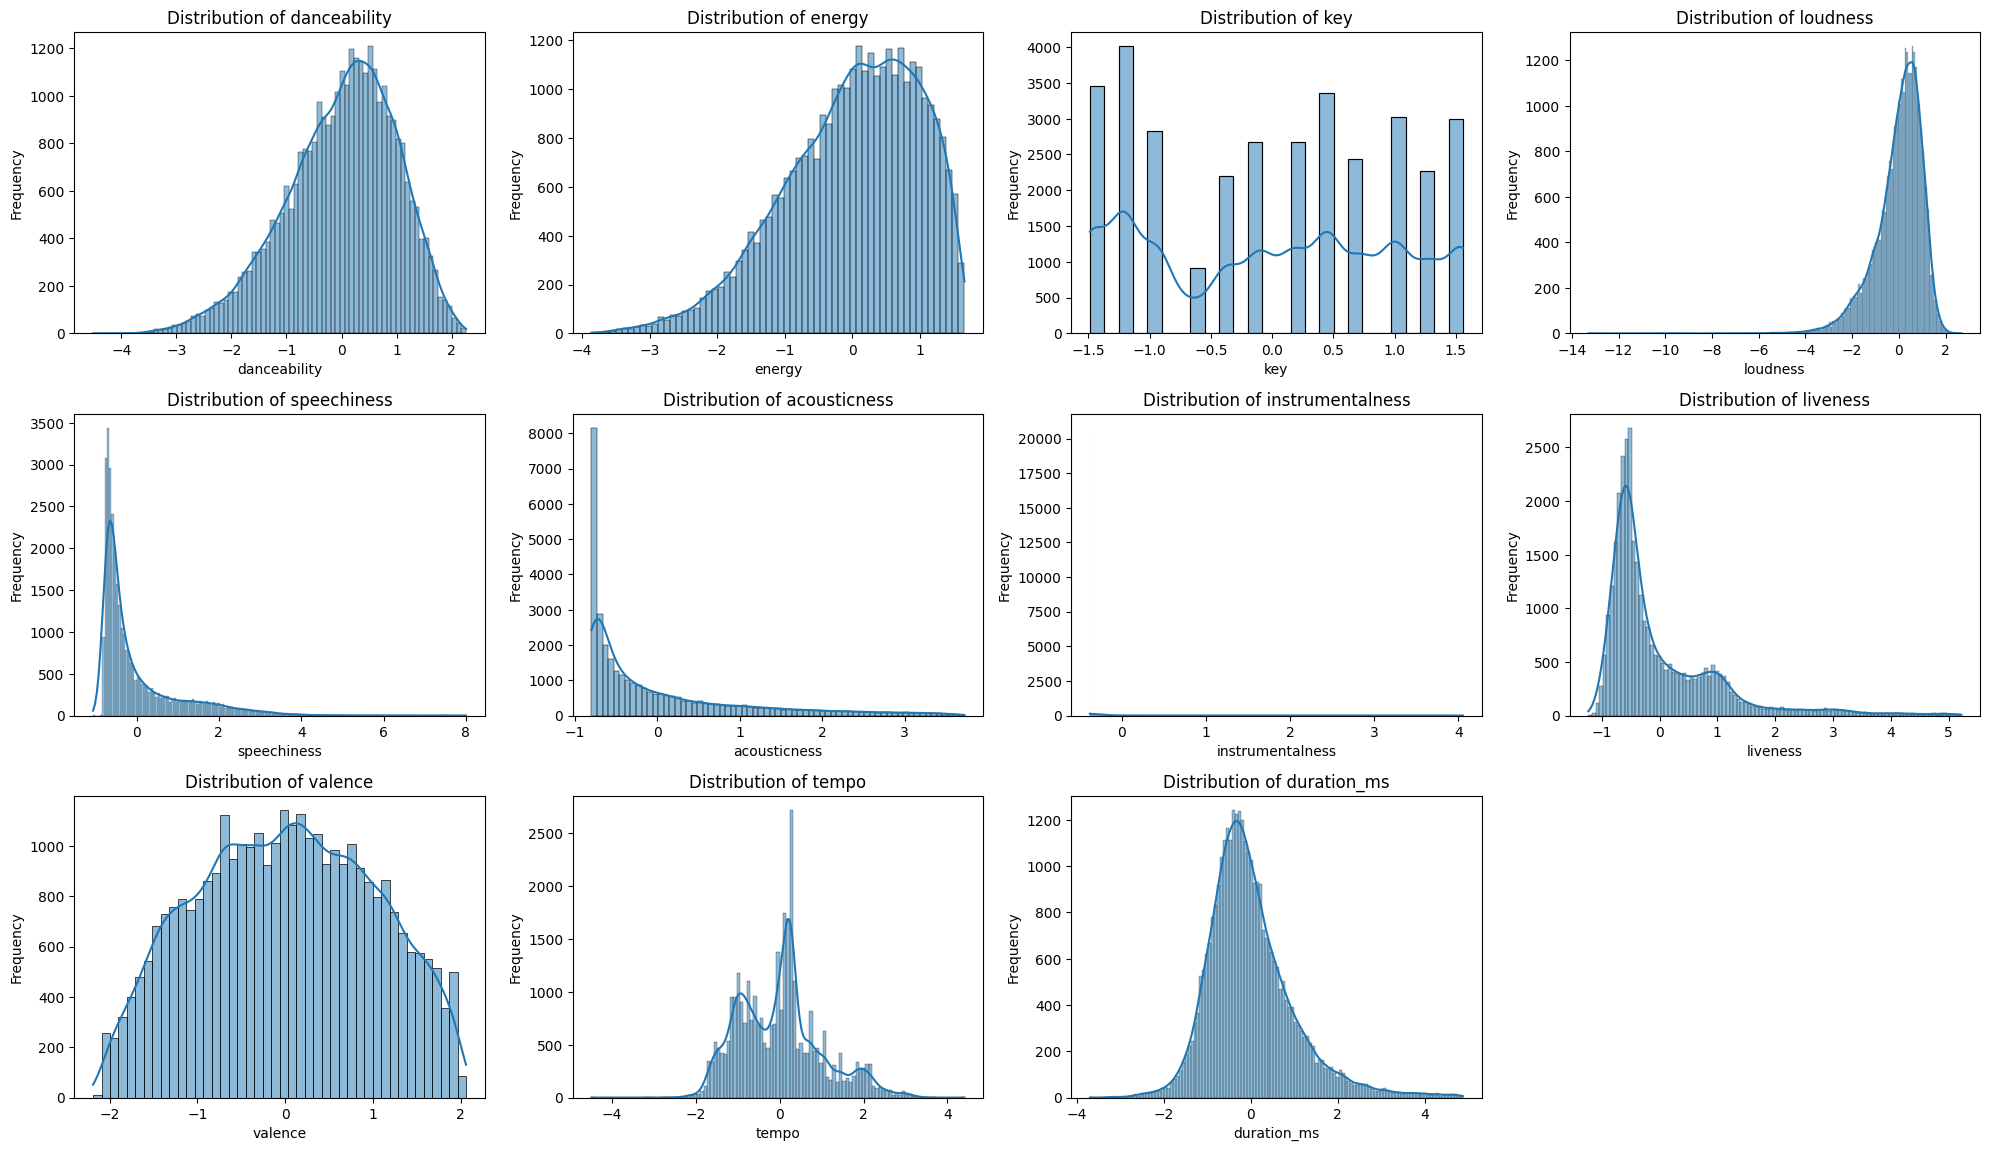

In [9]:
def standard_scaler(data):
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    standardized_data = (data - mean) / std
    return standardized_data

features = spotify_data.drop(columns=['track_name', 'playlist_subgenre'])
standardized_features = standard_scaler(features.values)

display(pd.DataFrame(standardized_features, columns=features.columns).head(10))

standardized_df = pd.DataFrame(standardized_features, columns=features.columns)

plt.figure(figsize=(20, 15))
for i, column in enumerate(standardized_df.columns, 1):
    plt.subplot(4, 4, i)
    sns.histplot(standardized_df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Dimensionality Reduction

One method for dimensionality reduction is Principal Component Analysis (PCA). Use its implementation from the `sklearn` library to reduce the dimensions of your data. Then, by using an appropriate cut-off for the `_explained_variance_ratio_` in the PCA algorithm, determine the number of principal components to retain.

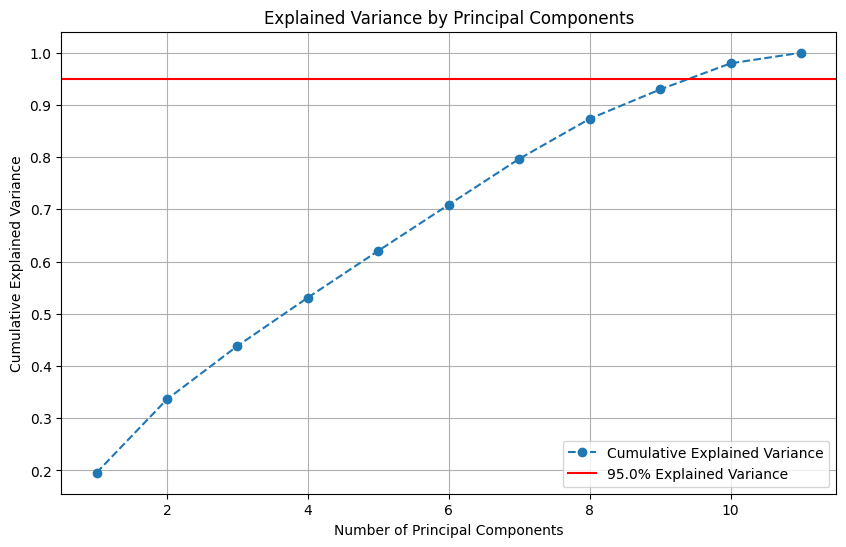

Number of components to retain 95% variance: 10


PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -1.550631 -0.659867 -0.447605 -0.714192  0.387677 -0.445800 -0.881434   
1 -1.097398 -0.956325 -0.160973  1.085015 -0.241478  0.565662 -1.707110   
2 -1.626319 -0.562865  0.027755 -1.659912 -0.028335  0.040885 -0.143682   
3 -1.599502 -0.078637  0.378164 -0.147372  0.624829  0.293519 -1.058804   
4 -1.087507 -0.538016 -0.300359 -1.692992 -0.319514 -0.292019 -0.039453   
5 -1.259623 -0.719102  0.296112  0.074811  0.595945 -0.346258 -0.840009   
6 -0.722322  1.429211  0.759051 -0.683664 -0.144038  0.176743 -1.342409   
7 -1.764675  0.759183  0.100966 -1.056017 -0.051023 -0.395962 -0.757595   
8 -2.219339  0.888213  1.205770  1.250715 -0.745659  1.390311 -0.871188   
9 -1.050637  0.094626 -0.676373 -1.145859 -0.592527 -0.504929  0.244824   

        PC8       PC9      PC10  
0  0.216551  0.192249 -0.565395  
1 -0.939124 -0.494096  0.084175  
2 -0.127991  0.298708  0.075464  
3  0.574453 -0.444260 -0.493042  
4 -0.503611  0.149532  0.367634  
5 -0.114773 -0.020895  0.402491  
6  0.773959  0.351442  0.116840  
7  0.478675  0.248349 -0.121755  
8 -0.816209 -0.631675 -0.640709  
9  0.076472  0.119214 -0.082787

In [8]:
pca = PCA()
pca.fit(standardized_features)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
cutoff = 0.95
num_components = np.argmax(cumulative_explained_variance >= cutoff) + 1

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--', label='Cumulative Explained Variance')
plt.axhline(y=cutoff, color='r', linestyle='-' , label=f'{cutoff*100}% Explained Variance', linewidth=1.5)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.legend()
plt.grid()
plt.show()

print(f'Number of components to retain 95% variance: {num_components}')

pca = PCA(n_components=num_components)
reduced_features = pca.fit_transform(standardized_features)
reduced_features_df = pd.DataFrame(reduced_features, columns=[f'PC{i+1}' for i in range(num_components)])
display(reduced_features_df.head(10))

# Clustering

Implement K-means for clustering from scratch.

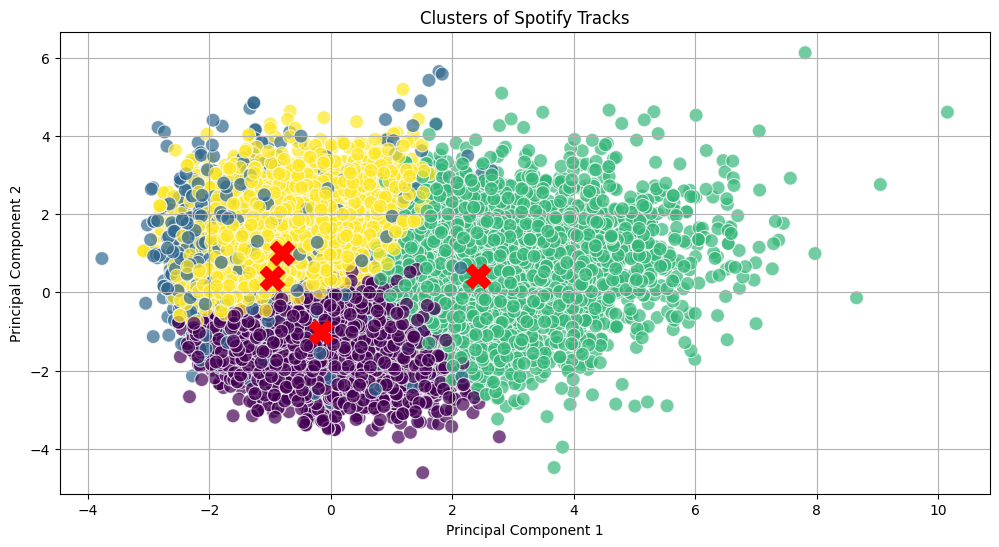

In [40]:

class myKmeans:
    def __init__(self, n_clusters=5, max_iters=100, tolerance=1e-5, shownames=False):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.tolerance = tolerance
        self.centroids = None
        self.labels_ = None
        self.shownames = shownames

    def initialize_centroids(self, data):
        np.random.seed(42)
        random_indices = np.random.permutation(data.shape[0])
        centroids = data[random_indices[:self.n_clusters]]
        return centroids

    def assign_clusters(self, data):
        distances = np.linalg.norm(data[:, np.newaxis] - self.centroids, axis=2)
        cluster_labels = np.argmin(distances, axis=1)
        return cluster_labels

    def update_centroids(self, data, cluster_labels):
        new_centroids = []
        for i in range(self.n_clusters):
            cluster_points = data[cluster_labels == i]
            if len(cluster_points) == 0:  # Handle empty clusters
                new_centroids.append(data[np.random.choice(data.shape[0])])
            else:
                new_centroids.append(cluster_points.mean(axis=0))
        return np.array(new_centroids)

    def has_converged(self, old_centroids, new_centroids):
        return np.linalg.norm(new_centroids - old_centroids) < self.tolerance

    def fit(self, data):
        self.centroids = self.initialize_centroids(data)
        for _ in range(self.max_iters):
            self.labels_ = self.assign_clusters(data)
            new_centroids = self.update_centroids(data, self.labels_)
            if self.has_converged(self.centroids, new_centroids):
                break
            self.centroids = new_centroids

    def predict(self, data):
        return self.assign_clusters(data)
    
    def plot_clusters(self, data):
        plt.figure(figsize=(12, 6))
        sns.scatterplot(x=data[:, 0], y=data[:, 1], hue=self.labels_, palette='viridis', s=100, alpha=0.7, legend=False)
        plt.scatter(self.centroids[:, 0], self.centroids[:, 1], s=300, c='red', marker='X', label='Centroids')
        if self.shownames:
            for cluster in range(self.n_clusters):
                cluster_center = self.centroids[cluster]
                genre = spotify_data[spotify_data['cluster'] == cluster]['playlist_subgenre'].mode().values[0]
                plt.text(cluster_center[0], cluster_center[1], genre, fontsize=12, ha='center', va='center', bbox=dict(facecolor='white', alpha=0.6, edgecolor='none'))
        plt.title('Clusters of Spotify Tracks')
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.grid()
        plt.show()

    def wss_score(self, data):
        return np.sum([np.linalg.norm(data[self.labels_ == i] - self.centroids[i], axis=1).sum() for i in range(self.n_clusters)])


k = 4
kmeans = myKmeans(n_clusters=k, max_iters=100, tolerance=1e-5)
kmeans.fit(reduced_features)
cluster_labels = kmeans.labels_
centroids = kmeans.centroids

spotify_data['cluster'] = cluster_labels

kmeans.plot_clusters(reduced_features)

Using the function you've created to execute the K-means algorithm eight times on your data, with the number of clusters ranging from 2 to 9. For each run, display the genre of each cluster using the first two principal components in a plot.

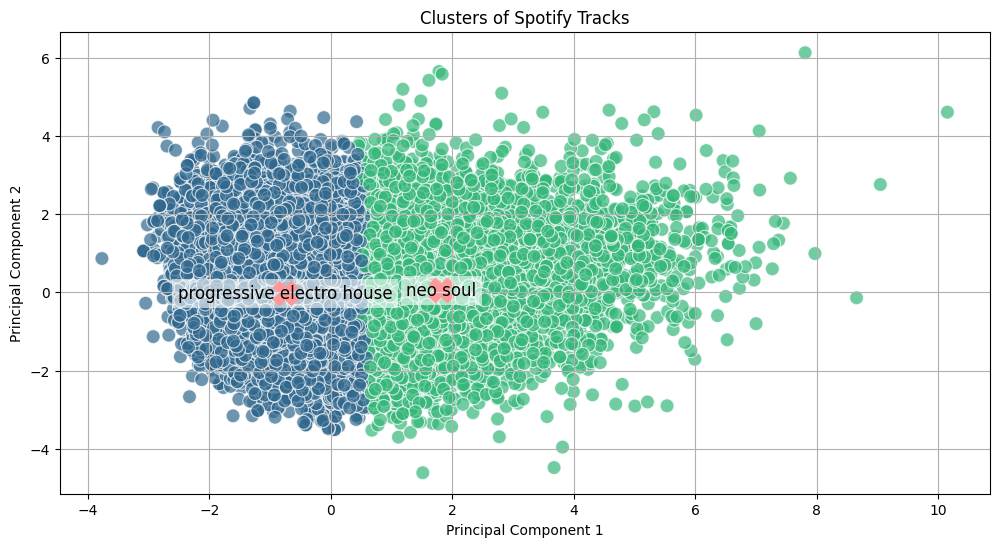

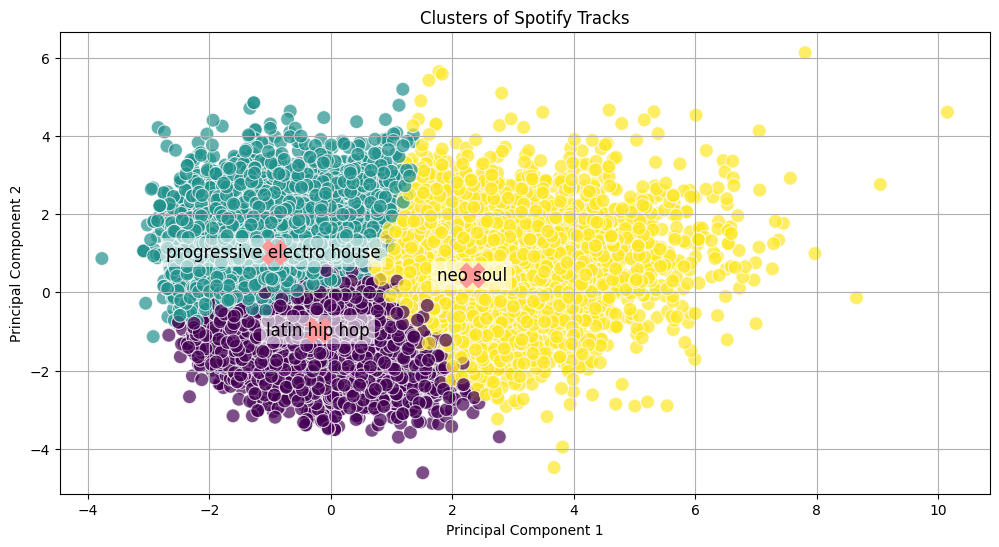

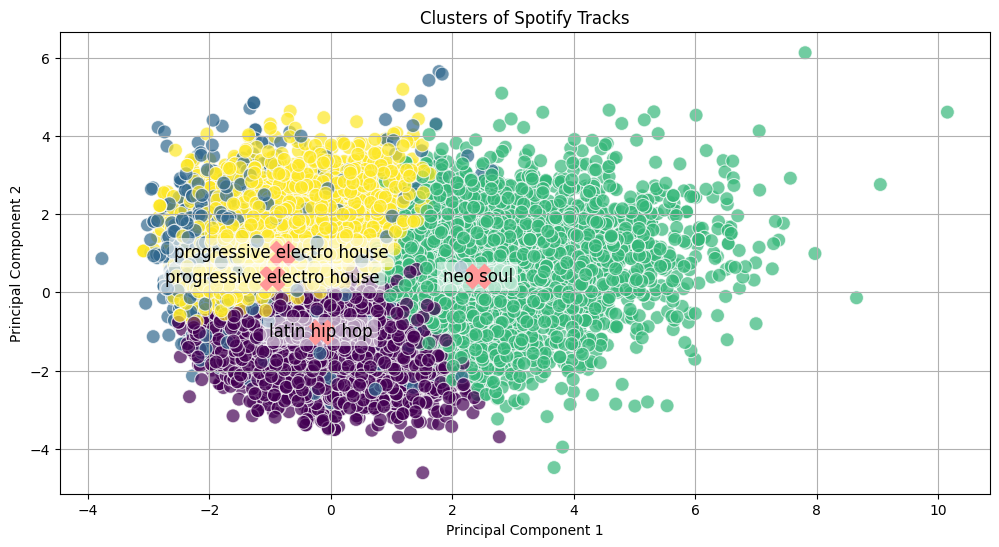

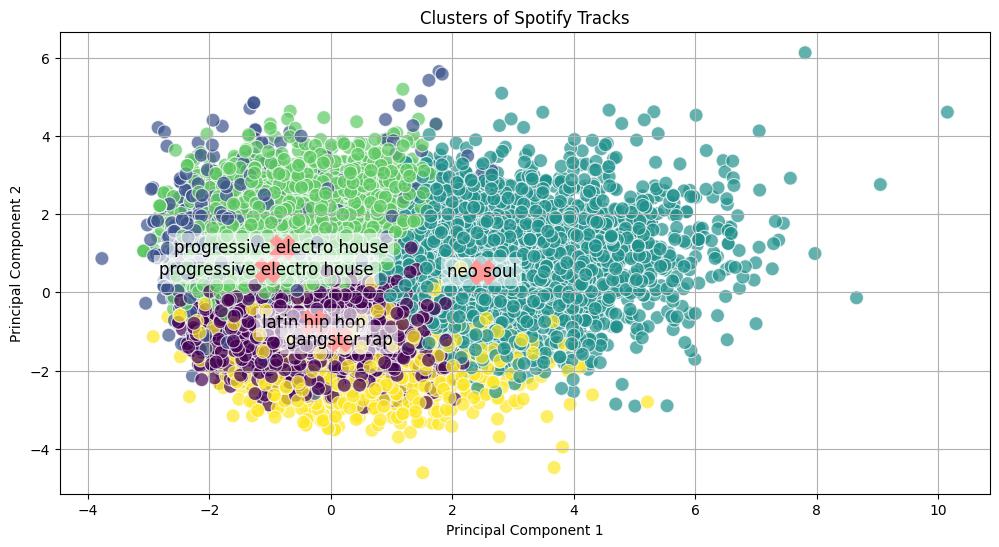

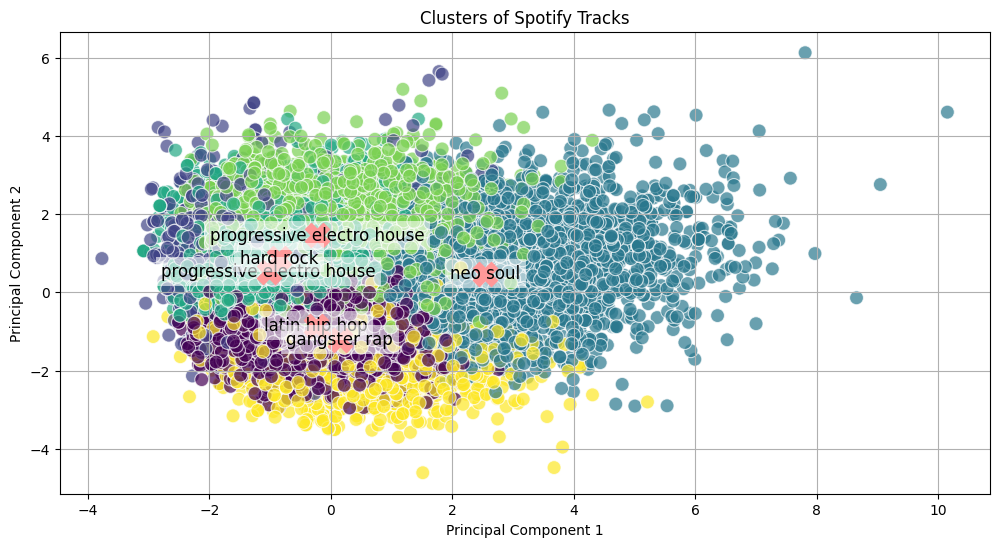

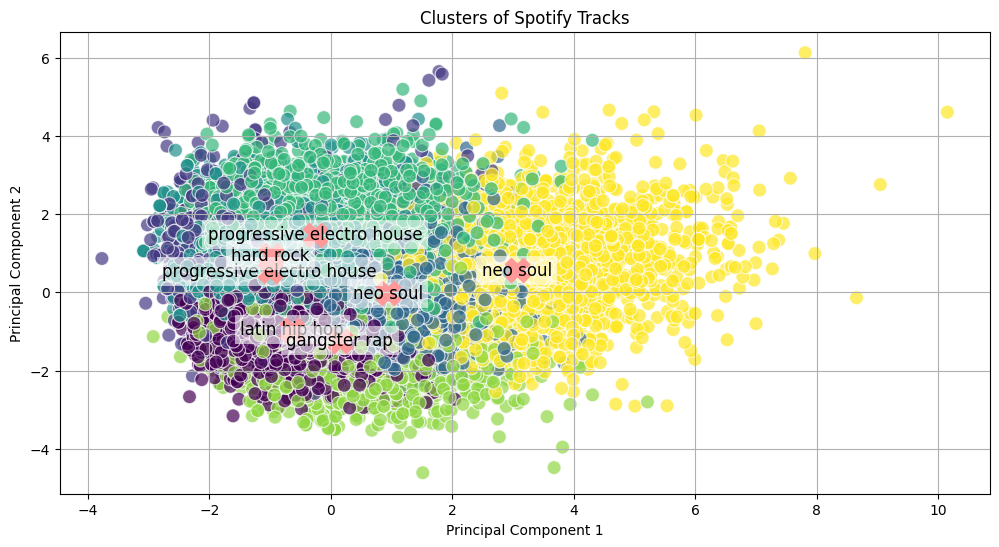

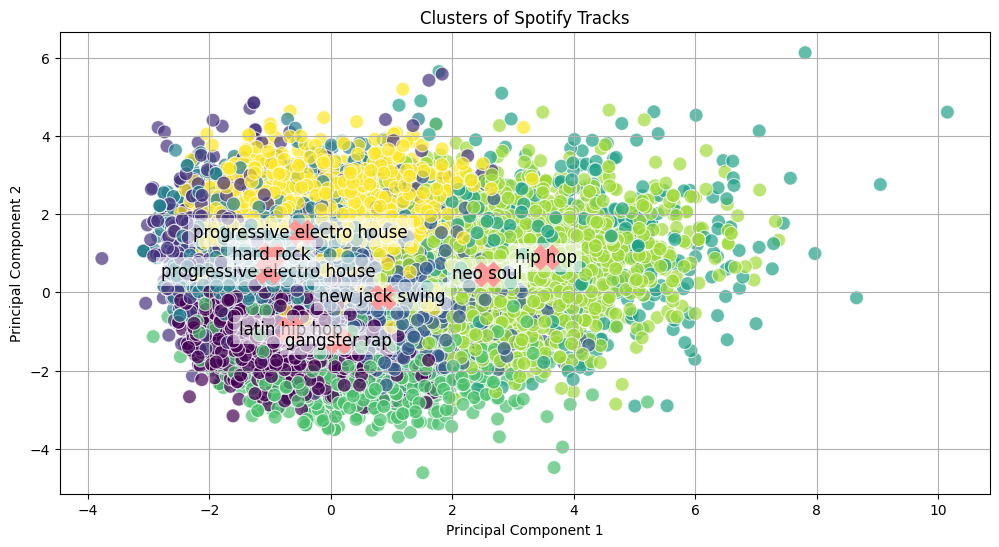

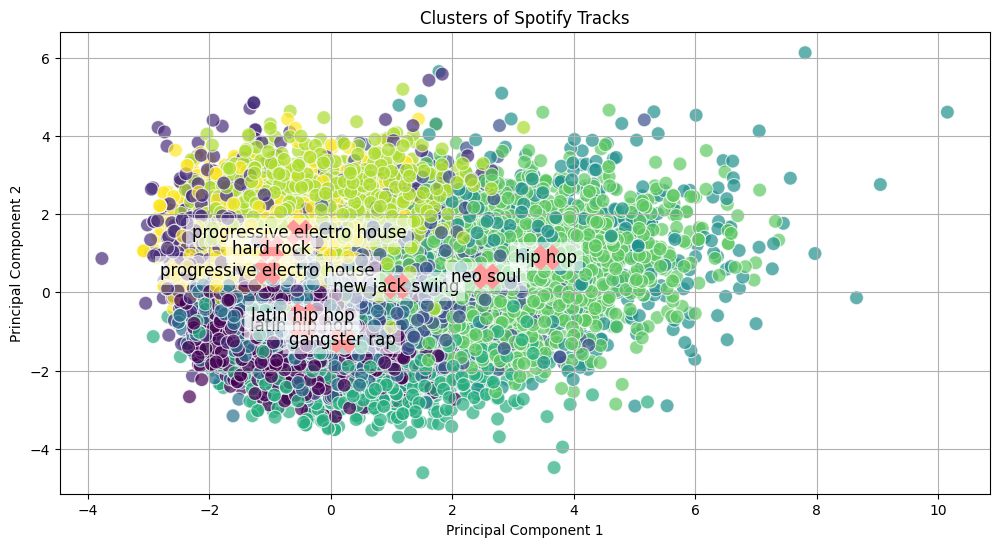

In [41]:
cluster_range = range(2, 10)
silhouette_scores = []
wss_scores = []


for k in cluster_range:
    kmeans = myKmeans(n_clusters=k, max_iters=100, tolerance=1e-5, shownames=True)
    kmeans.fit(reduced_features)
    spotify_data['cluster'] = kmeans.labels_
    silhouette_avg = silhouette_score(reduced_features, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)
    
    wss = kmeans.wss_score(reduced_features)
    wss_scores.append(wss)
    kmeans.plot_clusters(reduced_features)


The Silhouette score and the Within-Cluster Sum of Squares (WSS) score are two metrics used to assess the quality of your clustering. You can find more information about these two methods [here](https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb). Plot the Silhouette score and the WSS score for varying numbers of clusters, and use these plots to determine the optimal number of clusters (k).

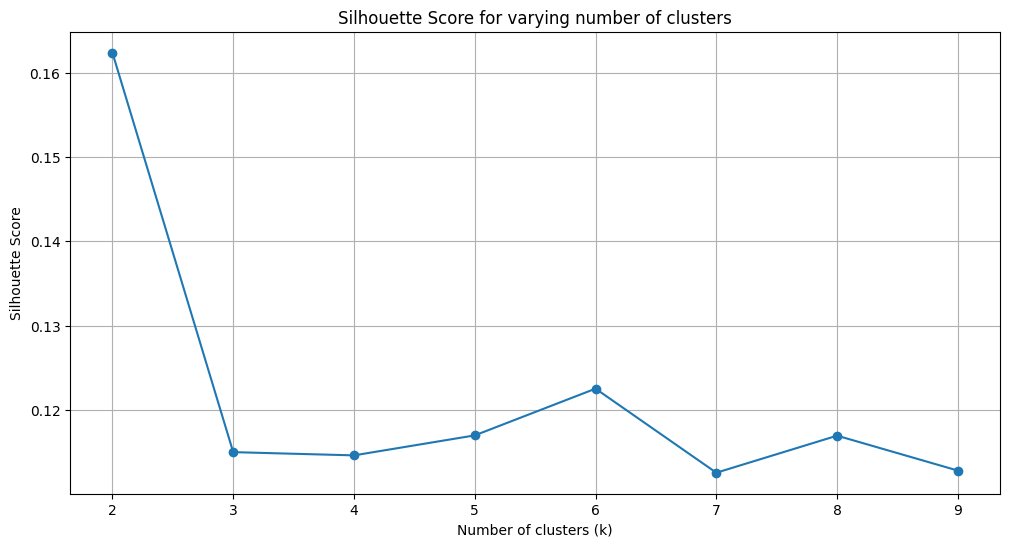

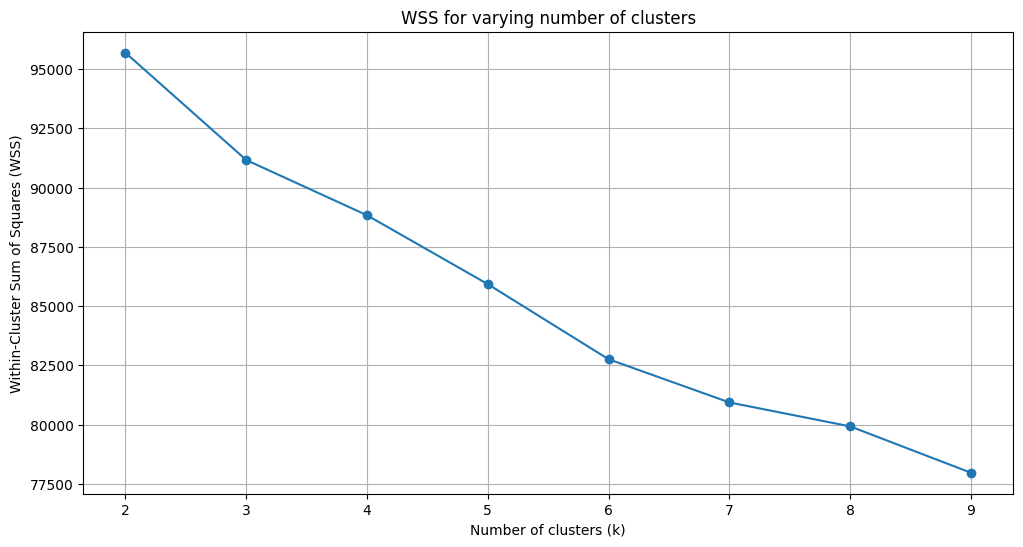

Optimal number of clusters based on Silhouette Score: 2
Optimal number of clusters based on WSS (Elbow Method): 2


In [58]:
plt.figure(figsize=(12, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for varying number of clusters')
plt.grid()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(cluster_range, wss_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WSS)')
plt.title('WSS for varying number of clusters')
plt.grid()
plt.show()

optimal_silhouette_clusters = cluster_range[np.argmax(silhouette_scores)]
optimal_wss_clusters = cluster_range[np.argmin(np.gradient(wss_scores))]

print(f'Optimal number of clusters based on Silhouette Score: {optimal_silhouette_clusters}')
print(f'Optimal number of clusters based on WSS (Elbow Method): {optimal_wss_clusters}')

To determine the optimal number of clusters using WSS and Silhouette metrics, plot WSS vs. the number of clusters and look for the "elbow" point where the rate of decrease sharply slows. For the Silhouette score, identify the number of clusters with the highest average score. The optimal cluster number balances low WSS and a high Silhouette score.


# Checking Output

To see how good was our clustering we will use a sample check and t-SNE method.

first randomly select two song from every cluster and see how close these two songs are.

In [51]:
def random_song_pairs(data, labels, n_clusters):
    pairs = []
    for cluster in range(n_clusters):
        cluster_data = data[labels == cluster]
        if len(cluster_data) < 2:
            print(f"Cluster {cluster} has fewer than 2 songs, skipping...")
            continue
        random_indices = np.random.choice(cluster_data.shape[0], 2, replace=False)
        song1, song2 = cluster_data[random_indices]
        distance = euclidean(song1, song2)
        pairs.append((cluster, random_indices, distance))
    return pairs
optimal_clusters = 10

kmeans = myKmeans(n_clusters=optimal_clusters, max_iters=100, tolerance=1e-5)
kmeans.fit(reduced_features)
spotify_data['cluster'] = kmeans.labels_
song_pairs = random_song_pairs(reduced_features, kmeans.labels_, optimal_clusters)

for cluster, (idx1, idx2), distance in song_pairs:
    song1_name = spotify_data.iloc[idx1]['track_name']
    song2_name = spotify_data.iloc[idx2]['track_name']
    print(f"Cluster {cluster}:")
    print(f"  Song 1: {song1_name}")
    print(f"  Song 2: {song2_name}")
    print(f"  Distance: {distance:.4f}\n")
    display(spotify_data.iloc[[idx1, idx2]])

Cluster 0:
  Song 1: She Will Be Loved - Radio Mix
  Song 2: The Journey
  Distance: 3.0918



track_name  danceability  energy playlist_subgenre  \
2096  She Will Be Loved - Radio Mix         0.651   0.663     post-teen pop   
4186                    The Journey         0.625   0.398   indie poptimism   

      key  loudness  speechiness  acousticness  instrumentalness  liveness  \
2096    0    -5.569       0.0281         0.228             0.000    0.0994   
4186    9   -10.218       0.0338         0.279             0.747    0.0893   

      valence    tempo  duration_ms  cluster  
2096    0.465  102.000       259453        9  
4186    0.265   86.992       266820        4

Cluster 1:
  Song 1: Wake Me Up Before You Go-Go
  Song 2: Blue (Da Ba Dee)
  Distance: 4.4713



track_name  danceability  energy playlist_subgenre  \
1768  Wake Me Up Before You Go-Go         0.618   0.764     post-teen pop   
751              Blue (Da Ba Dee)         0.822   0.969         dance pop   

      key  loudness  speechiness  acousticness  instrumentalness  liveness  \
1768    0    -6.027       0.0562         0.186          0.000000      0.12   
751     7   -11.471       0.0582         0.259          0.000162      0.39   

      valence    tempo  duration_ms  cluster  
1768    0.876   81.366       230693        9  
751     0.765  128.007       283748        7

Cluster 2:
  Song 1: Pretty Girl - Cheat Codes X CADE Remix
  Song 2: Enjoy the Silence
  Distance: 3.6034



track_name  danceability  energy  \
1486  Pretty Girl - Cheat Codes X CADE Remix         0.703   0.868   
3060                       Enjoy the Silence         0.646   0.763   

     playlist_subgenre  key  loudness  speechiness  acousticness  \
1486     post-teen pop    7    -4.661       0.0291        0.1500   
3060        electropop    0    -8.046       0.0273        0.0839   

      instrumentalness  liveness  valence    tempo  duration_ms  cluster  
1486          0.132000    0.1040    0.733  121.030       193613        0  
3060          0.000061    0.0944    0.736  112.931       253587        9

Cluster 3:
  Song 1: Intoxicated - Radio Edit
  Song 2: By Your Side
  Distance: 1.1289



track_name  danceability  energy playlist_subgenre  key  \
3826  Intoxicated - Radio Edit         0.792   0.688        electropop    0   
2925              By Your Side         0.696   0.743        electropop    6   

      loudness  speechiness  acousticness  instrumentalness  liveness  \
3826    -4.008       0.0386       0.00435           0.00477    0.0972   
2925    -3.838       0.0331       0.07780           0.00000    0.0581   

      valence    tempo  duration_ms  cluster  
3826    0.502  124.987       159560        9  
2925    0.644  122.978       201254        0

Cluster 4:
  Song 1: Get Stüpid
  Song 2: Head Over Heels - James Roe Remix
  Distance: 2.3612



track_name  danceability  energy  \
2027                         Get Stüpid         0.843   0.797   
981   Head Over Heels - James Roe Remix         0.670   0.810   

     playlist_subgenre  key  loudness  speechiness  acousticness  \
2027     post-teen pop   11    -4.597       0.0419       0.20200   
981          dance pop   11    -4.737       0.0497       0.00164   

      instrumentalness  liveness  valence    tempo  duration_ms  cluster  
2027          0.000117    0.0822    0.613  109.973       172800        0  
981           0.025700    0.6330    0.323  123.992       184003        1

Cluster 5:
  Song 1: Feel Good
  Song 2: No More (feat. Brenda Mullen) - Bottai Edit
  Distance: 3.4375



track_name  danceability  energy  \
328                                    Feel Good         0.702   0.903   
216  No More (feat. Brenda Mullen) - Bottai Edit         0.675   0.674   

    playlist_subgenre  key  loudness  speechiness  acousticness  \
328         dance pop    4    -3.921       0.0380       0.12100   
216         dance pop    4    -6.329       0.0372       0.00339   

     instrumentalness  liveness  valence    tempo  duration_ms  cluster  
328          0.000123     0.168    0.660  125.948       166947        9  
216          0.000086     0.279    0.414  125.037       200640        3

Cluster 6:
  Song 1: All In (CB Remix)
  Song 2: Honestly
  Distance: 1.7612



track_name  danceability  energy playlist_subgenre  key  \
874   All In (CB Remix)         0.582   0.791         dance pop    1   
1760           Honestly         0.641   0.787     post-teen pop    0   

      loudness  speechiness  acousticness  instrumentalness  liveness  \
874     -5.146       0.0322        0.1860               0.0      0.14   
1760    -4.271       0.0375        0.0268               0.0      0.11   

      valence   tempo  duration_ms  cluster  
874     0.340  91.975       187966        9  
1760    0.916  93.010       201507        9

Cluster 7:
  Song 1: Young
  Song 2: Years
  Distance: 2.5850



track_name  danceability  energy playlist_subgenre  key  loudness  \
1014      Young         0.724   0.798         dance pop    0    -5.370   
1536      Years         0.664   0.285     post-teen pop    9    -7.907   

      speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
1014       0.0367         0.229            0.0507    0.0846    0.238  124.974   
1536       0.0342         0.855            0.0000    0.0952    0.256  124.148   

      duration_ms  cluster  
1014       199159        9  
1536       190268        6

Cluster 8:
  Song 1: 8 Letters - R3HAB Remix
  Song 2: All I Ever Need
  Distance: 3.9923



track_name  danceability  energy playlist_subgenre  key  \
250   8 Letters - R3HAB Remix         0.638   0.708         dance pop    1   
1406          All I Ever Need         0.708   0.647     post-teen pop   11   

      loudness  speechiness  acousticness  instrumentalness  liveness  \
250     -5.001       0.0421         0.240               0.0     0.311   
1406    -6.128       0.0298         0.117               0.0     0.111   

      valence   tempo  duration_ms  cluster  
250     0.582  103.16       132233        9  
1406    0.654  129.95       213747        0

Cluster 9:
  Song 1: sweetener
  Song 2: 92 Explorer
  Distance: 3.0367



track_name  danceability  energy playlist_subgenre  key  loudness  \
2244    sweetener         0.722   0.461     post-teen pop    4    -6.428   
1969  92 Explorer         0.798   0.733     post-teen pop    7    -4.811   

      speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
2244       0.0319         0.256          0.000000     0.214    0.464  119.910   
1969       0.0476         0.265          0.000001     0.114    0.861  146.046   

      duration_ms  cluster  
2244       208493        2  
1969       211427        0

Using t-SNE reduce dimension of data pointe to 2D and plot it to check how good datapoints are clustered (implementing this part is optional and have extra points)

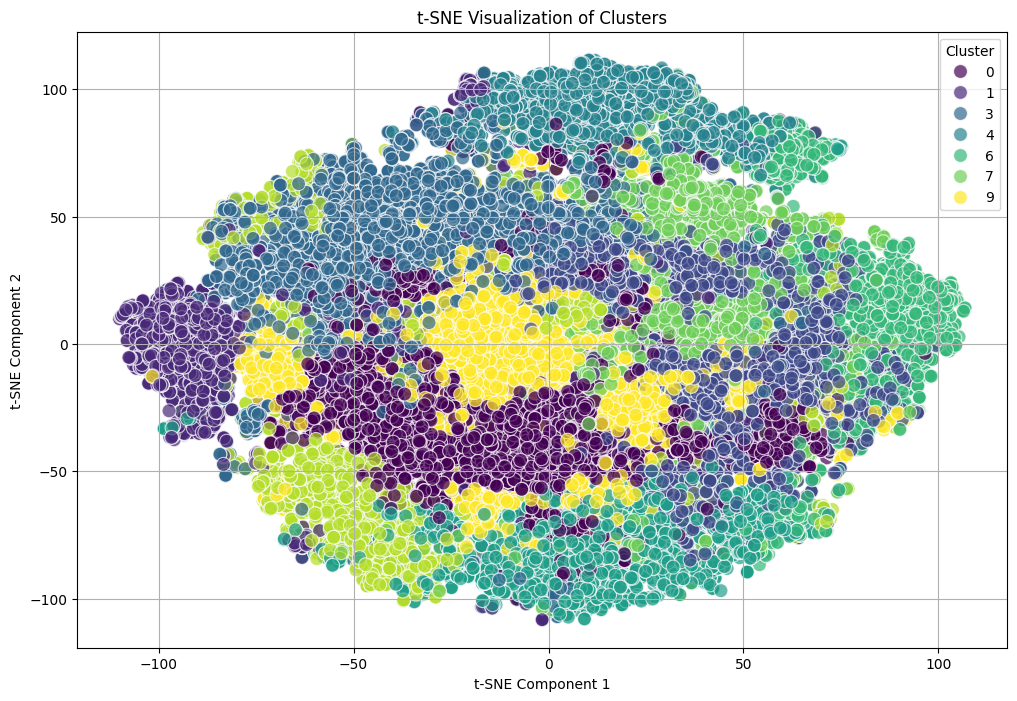

In [52]:
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(reduced_features)

tsne_df = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'])
tsne_df['cluster'] = kmeans.labels_

plt.figure(figsize=(12, 8))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='cluster', palette='viridis', data=tsne_df, s=100, alpha=0.7)
plt.title('t-SNE Visualization of Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Cluster')
plt.grid()
plt.show()

Overall, the t-SNE plot reveals some clusters are distinct while others are intermixed, indicating areas where the clustering algorithm might need improvement